In [2]:
#import the necessary files
import pandas as pd
import sqlite3

In [3]:
#Extract the cvs file.
bom_movie=pd.read_csv('bom.movie_gross.csv')

In [4]:
# Display of the first 10 data in the set.
bom_movie.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [5]:
#Summary of dataframe.
bom_movie.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
#Statistical measure summary.
bom_movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [7]:
#checking for Duplicates.
bom_movie.duplicated().value_counts()

False    3387
Name: count, dtype: int64

In [8]:
conn=sqlite3.connect('im.db')
basics=pd.read_sql("""
select * from movie_basics;
""",conn)
basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [9]:
# Summary of dataframe.
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
# Columns of the dataset
basics.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [11]:
#checking for duplicates.
basics.duplicated().value_counts()

False    146144
Name: count, dtype: int64

In [12]:
ratings=pd.read_sql("""
select * from movie_ratings;
""",conn)
ratings.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [13]:
# Merge relevant columns
bom_movie = bom_movie.rename(columns={'title': 'original_title'})
movies_merged = pd.merge(basics, ratings, on = 'movie_id', how ='outer')
movies_merged = pd.merge(movies_merged, bom_movie, on='original_title',how ='outer')
movies_merged.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",7.2,43.0,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,6.9,4517.0,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN


In [14]:
# Lenght of specified column.
len(movies_merged['movie_id'])

147367

In [15]:
#Checking for the sum of missing values.
movies_merged['studio'].isna().sum()

143373

In [16]:
#movies_merged_subset=movies_merged[movies_merged['studio']].dropna()
movies_merged_subset=movies_merged.dropna()

movies_merged_subset.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
57,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",6.1,37886.0,IFC,744000.0,8000000,2012.0
60,tt4339118,On the Road,On the Road,2014.0,89.0,Drama,6.0,6.0,IFC,744000.0,8000000,2012.0
62,tt5647250,On the Road,On the Road,2016.0,121.0,Drama,5.7,127.0,IFC,744000.0,8000000,2012.0
69,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",7.3,275300.0,Fox,58200000.0,129900000,2013.0
73,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",6.5,105116.0,Uni.,26300000.0,26900000,2014.0


In [17]:
#Confiming the lenght after merging
len(movies_merged['movie_id'])

147367

In [18]:
#Replacing commas on genres column with_ for code readability.
movies_merged_subset.loc[:,'genres']=movies_merged_subset['genres'].str.replace(',','_')

In [19]:
#Converting strings to float.
movies_merged_subset.copy()
movies_merged_subset.loc[:,'foreign_gross']=movies_merged_subset['foreign_gross'].astype(str)
movies_merged_subset.loc[:,'foreign_gross']=movies_merged_subset['foreign_gross'].str.replace(',','')
movies_merged_subset.loc[:,'foreign_gross']=pd.to_numeric(movies_merged_subset['foreign_gross'], errors='coerce')
movies_merged_subset.loc[:,'foreign_gross']=movies_merged_subset['foreign_gross'].fillna(0)

In [20]:
#movies_merged_subset.loc[:,'domestic_gross'] = movies_merged_subset['domestic_gross'].astype(int)

In [21]:
# Adding a row by summing domestic and foreign gross.
movies_merged_subset.loc[:, 'gross_earning'] = movies_merged_subset['domestic_gross'] + movies_merged_subset['foreign_gross']
movies_merged_subset.head()

C:\Users\LCheptoo.CIHEBK\AppData\Local\Temp\ipykernel_12676\3505904101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_merged_subset.loc[:, 'gross_earning'] = movies_merged_subset['domestic_gross'] + movies_merged_subset['foreign_gross']


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,gross_earning
57,tt0337692,On the Road,On the Road,2012.0,124.0,Adventure_Drama_Romance,6.1,37886.0,IFC,744000.0,8000000.0,2012.0,8744000.0
60,tt4339118,On the Road,On the Road,2014.0,89.0,Drama,6.0,6.0,IFC,744000.0,8000000.0,2012.0,8744000.0
62,tt5647250,On the Road,On the Road,2016.0,121.0,Drama,5.7,127.0,IFC,744000.0,8000000.0,2012.0,8744000.0
69,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,Adventure_Comedy_Drama,7.3,275300.0,Fox,58200000.0,129900000.0,2013.0,188100000.0
73,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,Action_Crime_Drama,6.5,105116.0,Uni.,26300000.0,26900000.0,2014.0,53200000.0


EDA


In [22]:
# Detecting NaNs.
#basics=pd.read_sql("""
#select * from movie_basics;
#""",conn)
basics.isna().sum()


movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [23]:
# Detecting NaNs.
bom_movie=pd.read_csv('bom.movie_gross.csv')

bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [24]:
basics=pd.read_sql("""
select * from
movie_ratings;               
""",conn)
basics.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [25]:
#checking for NaNs.
bom_movie=pd.read_csv('bom.movie_gross.csv')
print(bom_movie.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


Visualization
Bar plot for movie genre.

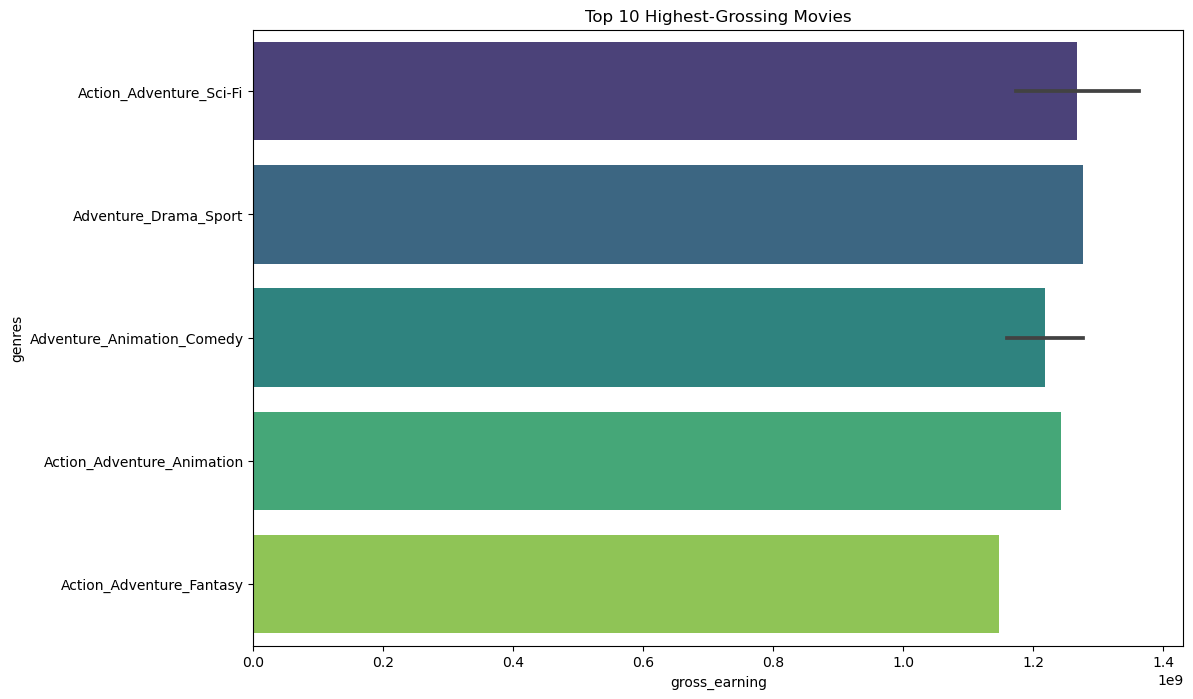

In [26]:
#Top ten highest domestic movies

import matplotlib.pyplot as plt
import seaborn as sns

top_10  =movies_merged_subset.sort_values(by='gross_earning',ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='gross_earning',y='genres',data=top_10,palette='viridis')
plt.title('Top 10 Highest-Grossing Movies')
plt.xlabel=('Gross_Earning')
plt.ylabel=('Genres')
plt.show()

TypeError: 'str' object is not callable

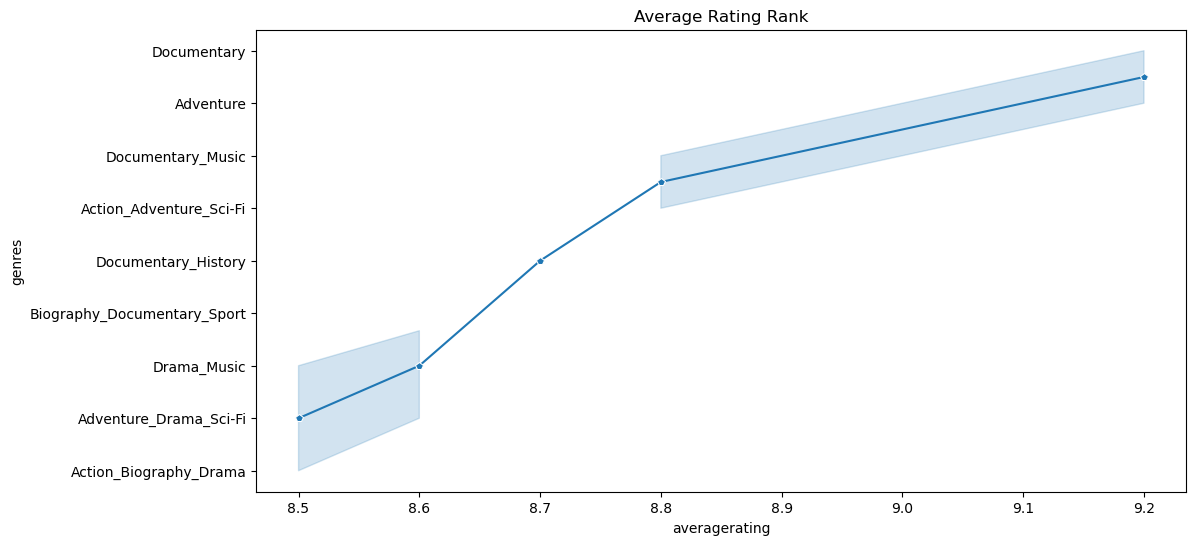

In [27]:
#Average rating vs the genres

top_10  =movies_merged_subset.sort_values(by='averagerating',ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.lineplot(x='averagerating',y ='genres',data = top_10 , marker='p')
plt.title('Average Rating Rank')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()


TypeError: 'str' object is not callable

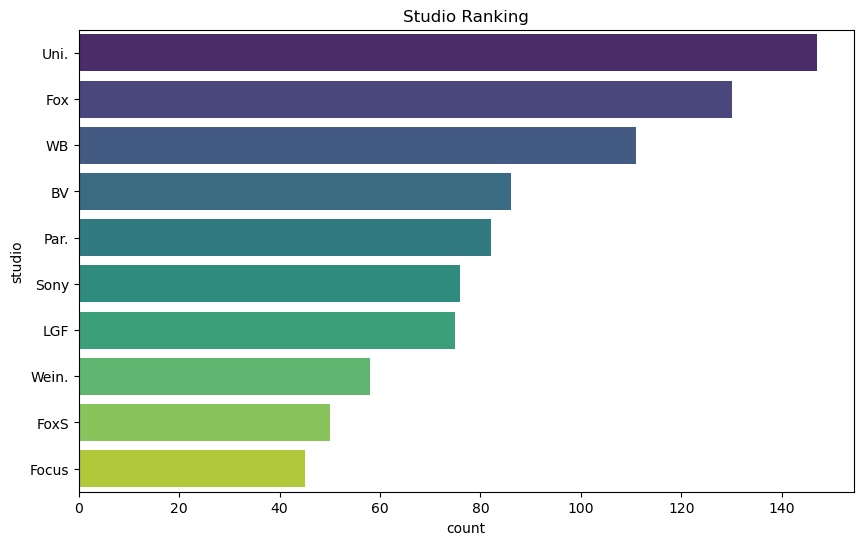

In [31]:
#studio ranking
top_10 = movies_merged_subset['studio'].value_counts().head(10).reset_index()
top_10.columns = ['studio', 'count']


plt.figure(figsize=(10,6))
sns.barplot(x='count', y='studio', data = top_10, palette ='viridis')
plt.title('Studio Ranking')
plt.xlabel('Movie Counts')
plt.ylabel('Studio')
plt.show()

TypeError: 'str' object is not callable

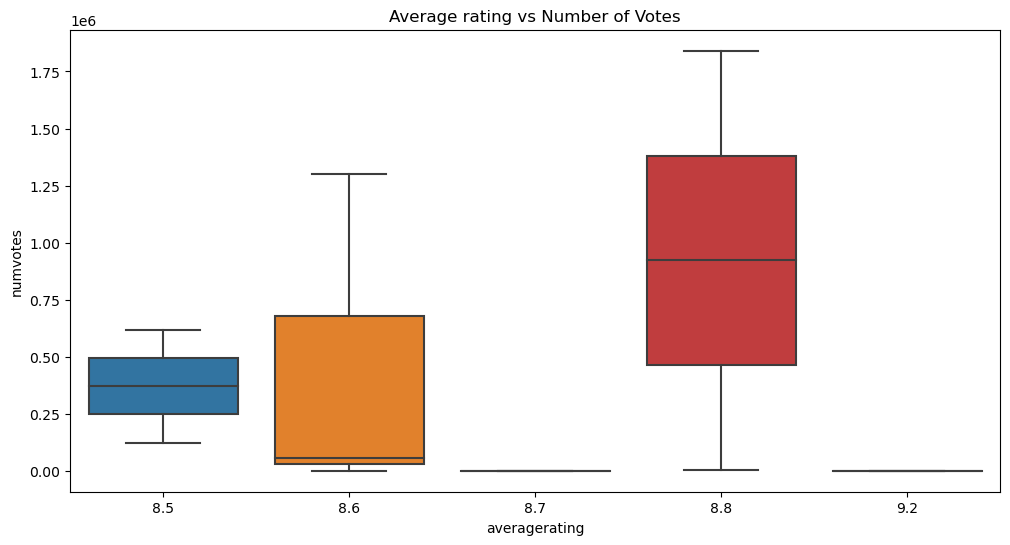

In [29]:
#Average rating against the number of votes

top_10 = movies_merged_subset.sort_values(by='averagerating',ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.boxplot(x='averagerating',y='numvotes',data = top_10)
plt.title('Average rating vs Number of Votes')
plt.xlabel('Average rating ')
plt.ylabel('Number of Votes')
plt.show()
